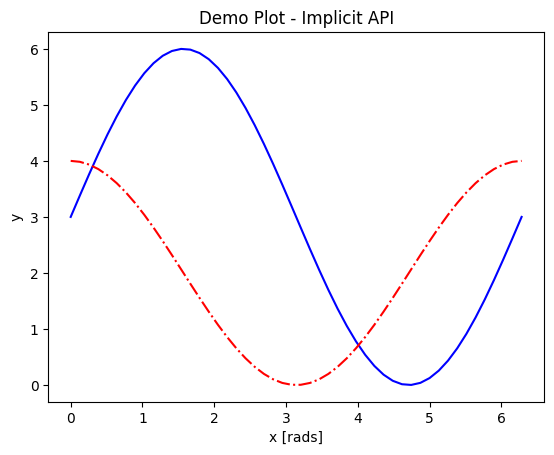

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# this code block uses Jupyter to execute
%matplotlib inline
x = np.linspace(0,2*np.pi, 50)   # fake some data
# Minimum working example with 2 functions
plt.plot(x,3+3*np.sin(x),'b-',
         x, 2+2*np.cos(x), 'r-.')
plt.xlabel('x [rads]')
plt.ylabel('y')
plt.title('Demo Plot - Implicit API')
plt.show()

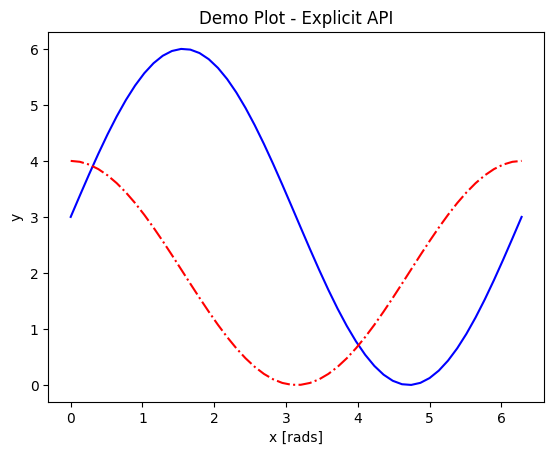

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# this code block uses Jupyter to execute
%matplotlib inline
x = np.linspace(0,2*np.pi, 50)
# Better way for later formatting
fig, ax = plt.subplots()
ax.plot(x,3+3*np.sin(x),'b-')
ax.plot(x, 2+2*np.cos(x), 'r-.')
ax.set_xlabel('x [rads]')
ax.set_ylabel('y')
ax.set_title('Demo Plot - Explicit API')
plt.show()

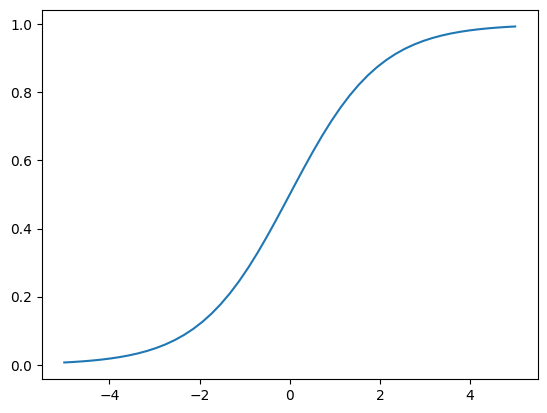

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(-5,5, 50)
fig, ax = plt.subplots()
ax.plot(x, 1/(1+np.exp(-x)))
plt.show()

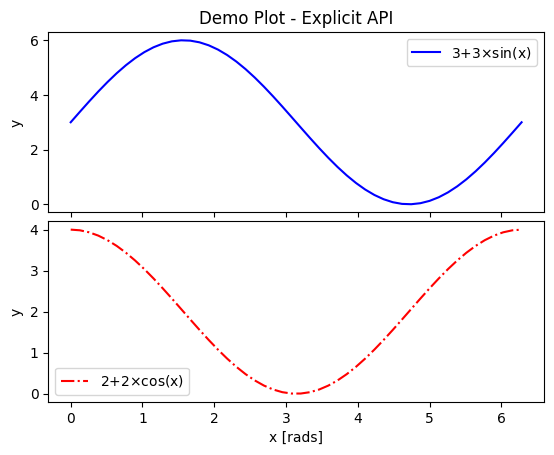

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi, 50)
fig, axes = plt.subplots(nrows=2,  sharex=True)
fig.subplots_adjust(hspace=0.05) #reduces space between 2 plots
axes[0].plot(x,3+3*np.sin(x),'b-', label=r'3+3$\times$sin(x)')
axes[1].plot(x, 2+2*np.cos(x), 'r-.', label=r'2+2$\times$cos(x)')
axes[1].set_xlabel('x [rads]')
for ax in axes:
    ax.legend()
    ax.set_ylabel('y')
axes[0].set_title('Demo Plot - Explicit API')
plt.show()

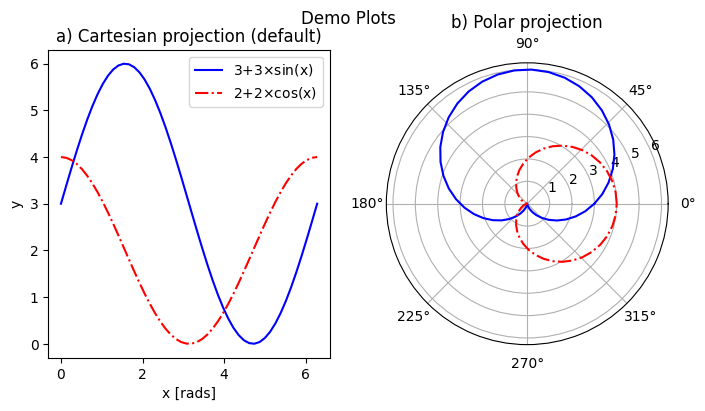

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi, 50)
# for variable projections
fig = plt.figure(figsize=(8,4))
ax1 = plt.subplot(121)
#once labels are added, have to break up plt.plot()
#  args cannot follow kwargs
ax1.plot(x,3+3*np.sin(x),'b-', label=r'3+3$\times$sin(x)')
ax1.plot(x, 2+2*np.cos(x), 'r-.', label=r'2+2$\times$cos(x)')
ax1.set_xlabel('x [rads]')
ax1.set_ylabel('y')
ax1.legend()
ax1.set_title('a) Cartesian projection (default)')
ax2 = plt.subplot(122, projection='polar')
ax2.plot(x, 3+3*np.sin(x), 'b-', x, 2+2*np.cos(x), 'r-.')
ax2.set_title('b) Polar projection')
fig.suptitle('Demo Plots')
plt.show()

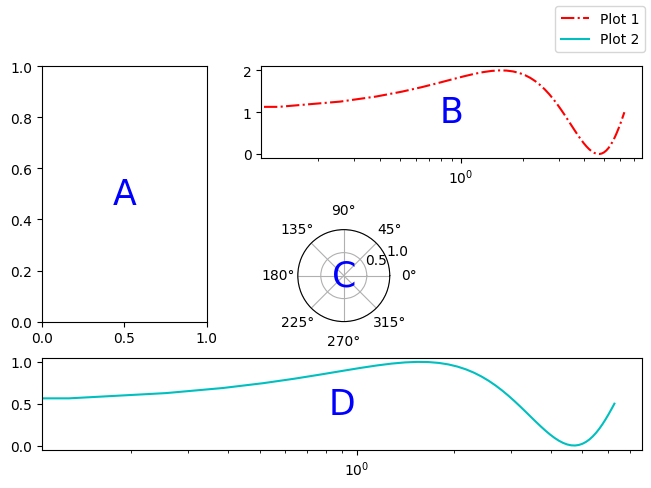

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.linspace(0,2*np.pi, 50)
fig, axd = plt.subplot_mosaic(
    """
    ABB
    AC.
    DDD
    """, layout="constrained",
    per_subplot_kw={"C": {"projection": "polar"},
                   ('B','D'): {'xscale':'log'}})
for k, ax in axd.items():
    ax.text(0.5, 0.5, k, transform=ax.transAxes,
            ha="center", va="center",  color="b",
            fontsize=25)
axd['B'].plot(x, 1+np.sin(x), 'r-.',
              label='Plot 1')
axd['D'].plot(x,0.5+0.5*np.sin(x), 'c-',
              label='Plot 2')
fig.legend(loc='outside upper right')

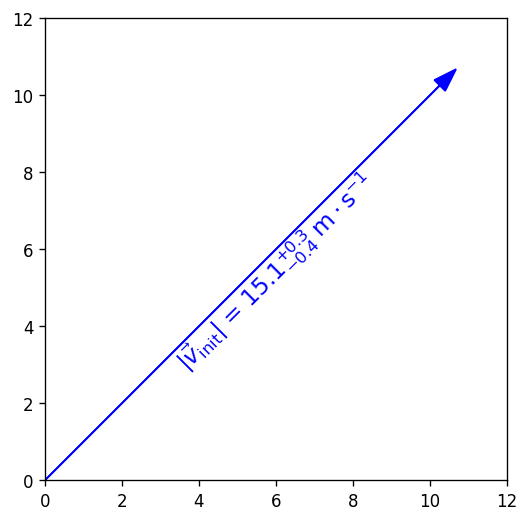

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
v_init=15.1
error_arr=[-0.4,0.3]
fig,ax=plt.subplots(dpi=120,figsize=(5,5))
ax.set_aspect('equal') #arrowheads will slant if axes are not equal
ax.arrow(0,0,10.68,10.68,length_includes_head=True,color='b',
         head_width=0.4)
ax.text(6, 5.4, r"$|\vec{{v}}_{{\mathrm{{init}}}}|$ = ${:.1f}_{{{:.1}}}^{{+{:.1}}}\;\mathrm{{m\cdot s}}^{{-1}}$".format(v_init,*error_arr),
        ha='center',va='center',rotation=45.,size=14, color='b')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
plt.show()

<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Admin\AppData\Local\Temp\ipykernel_27032\1346995707.py:32: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('Intensity [W(m$\cdot$sr$\cdot$nm)$^{-1}$]')
C:\Users\Admin\AppData\Local\Temp\ipykernel_27032\1346995707.py:19: RuntimeWarning: divide by zero encountered in divide
  lambda x: 0.001*c/x))


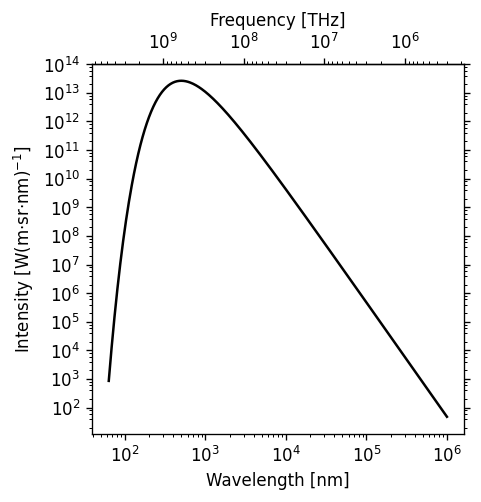

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#blackbody curve for the temperature of the sun
# as a function of wavelength
c = 2.998*10**8.
k_b = 1.380649*10**-23.
hc = (2.998*10**8.)*(6.626*10**-34.)
def bb(wvl,T):
    return ((2*hc*c)/(wvl**5)) * 1/(np.exp(hc/(wvl*k_b*T)) - 1)
wvs = np.logspace(-7.2,-3.0,471) #x-values
bb5777 = bb(wvs,5777.) #y-values
#===============================================================
import matplotlib.ticker as ticks
fig, ax = plt.subplots(dpi=120, figsize=(4,4))
ax.plot(wvs*10**9,bb5777,'k-')
# 1 nm = 10^-9 m, 1 THz = 10^12 Hz
secax = ax.secondary_xaxis('top',functions=(lambda x: 1000*c/x,
                                            lambda x: 0.001*c/x))
#1st func. is primary-to-secondary
#2nd func. is secondary-to-primary
ax.set_xscale('log')
ax.set_yscale('log')
# PAY SPECIAL ATTENTION TO THE NEXT 4 LINES
ax.yaxis.set_major_locator(ticks.LogLocator(base=10,numticks=99))
ax.yaxis.set_minor_locator(ticks.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),
                                            numticks=99))
ax.yaxis.set_minor_formatter(ticks.NullFormatter())
ax.tick_params(axis='y',which='both',right=True)
ax.set_xlabel('Wavelength [nm]')
secax.set_xlabel('Frequency [THz]')
ax.set_ylabel('Intensity [W(m$\cdot$sr$\cdot$nm)$^{-1}$]')
plt.show()

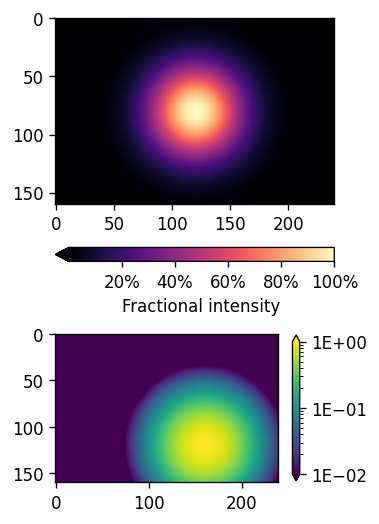

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#mock up some data
x = np.arange(-3.0, 3.0, 0.025)
y = np.arange(-2.0, 2.0, 0.025)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               figsize=[3,6],
                               dpi=120)
plt.subplots_adjust(hspace=-0.1)
img1 = ax1.imshow(Z1, cmap='magma')
img2 = ax2.imshow(Z2, norm='log', vmin=0.01)
cbar1 = fig.colorbar(img1, ax=ax1, extend='min',orientation='horizontal',
                     format= ticks.FuncFormatter(lambda x, _: f"{x:.0%}"))
# The _ is because FuncFormatter passes in both the label and the position,
# but we don't need the latter. The _ lets us dump the position.
cbar1.set_label('Fractional intensity')
cbar2 = fig.colorbar(img2, ax=ax2, shrink=0.5,
                     extend='both', format="{x:.0E}")
plt.show()